In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Hệ thống cảnh báo cháy sử dụng yolo trên thời gian thực

In [ ]:
# 🔽 1. Cài đặt YOLOv8 (Ultralytics)
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:

# 📚 Import
from ultralytics import YOLO
from roboflow import Roboflow

# 🔽 Tải dataset từ Roboflow
rf = Roboflow(api_key="g5iPt2V4Y6fxPzhQMewE")
project = rf.workspace("-jwzpw").project("continuous_fire")
version = project.version(6)
dataset = version.download("yolov8")  # Tự động tải về và giải nén

# 📄 Lấy đường dẫn tới file data.yaml mà Roboflow đã tạo sẵn
data_yaml_path = dataset.location + "/data.yaml"

# 🧠 Load mô hình YOLOv8 (tiny version)
model = YOLO("yolov8n.pt")




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to continuous_fire-6 in yolov8:: 100%|██████████| 5030/5030 [00:00<00:00, 12239.32it/s]


100%|██████████| 6.25M/6.25M [00:00<00:00, 307MB/s]


In [ ]:
print("📁 Dataset location:", dataset.location)
print("📄 data.yaml path:", data_yaml_path)


📁 Dataset location: /content/continuous_fire-6
📄 data.yaml path: /content/continuous_fire-6/data.yaml


- dữ liệu đã được chia thành 3 tập test, train , val trước khi tải về


Các bước tăng cường dữ liệu

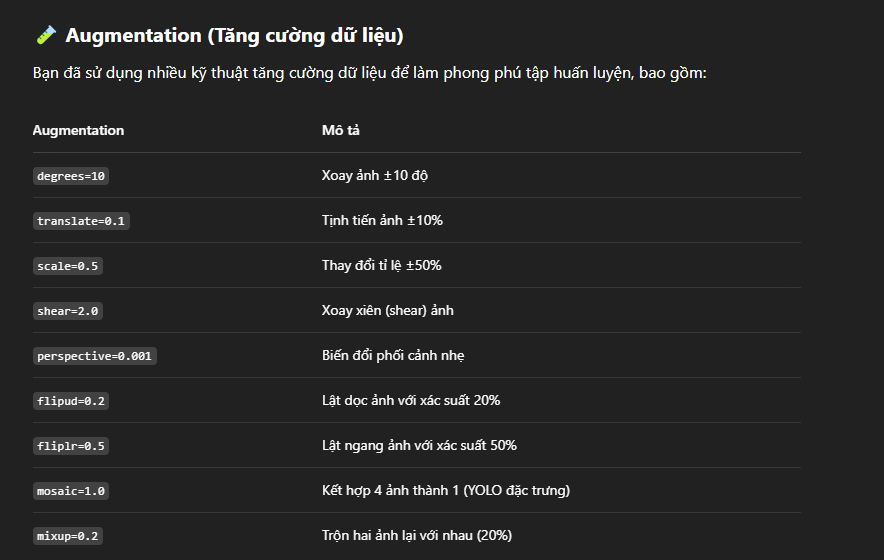



| Tham số               | Ý nghĩa                                                            |
| --------------------- | ------------------------------------------------------------------ |
| `lr0=0.005`           | Learning rate ban đầu – tốc độ điều chỉnh trọng số.                |
| `lrf=0.01`            | Learning rate cuối cùng = `lr0 × lrf` sau `epochs` epoch.          |
| `momentum=0.937`      | Momentum giúp giảm dao động khi tối ưu (giống quán tính).          |
| `weight_decay=0.0005` | Regularization – ngăn overfitting bằng cách phạt trọng số lớn.     |
| `warmup_epochs=3`     | Epoch đầu làm "làm nóng" – khởi động từ từ trước khi tăng tốc học. |
| `warmup_momentum=0.8` | Momentum trong giai đoạn warmup.                                   |
| `warmup_bias_lr=0.1`  | Learning rate riêng cho bias (thường cao hơn) trong warmup.        |


In [ ]:

# 🚀 Huấn luyện mô hình
model.train(
    data=data_yaml_path,   # Đường dẫn đến file data.yaml
    epochs=50,             # Số lượng epoch huấn luyện
    imgsz=640,             # Kích thước ảnh đầu vào
    batch=16,              # Kích thước batch

    name="fire_yolo8_augmented",  # Tên của experiment / folder lưu kết quả

    # 🧪 Cấu hình kỹ thuật Augmentation để tăng dữ liệu huấn luyện
    degrees=10,           # Xoay ảnh ±10 độ
    translate=0.1,        # Dịch chuyển ảnh ±10%
    scale=0.5,            # Phóng to/thu nhỏ ảnh ±50%
    shear=2.0,            # Nghiêng ảnh
    perspective=0.001,    # Biến dạng phối cảnh nhẹ
    flipud=0.2,           # Lật ảnh theo chiều dọc với xác suất 20%
    fliplr=0.5,           # Lật ảnh theo chiều ngang với xác suất 50%
    mosaic=1.0,           # Áp dụng kỹ thuật Mosaic (ghép 4 ảnh)
    mixup=0.2,            # Áp dụng MixUp với xác suất 20%

    # 🔧 Các siêu tham số để điều chỉnh quá trình học
    lr0=0.005,            # Learning rate ban đầu
    lrf=0.01,             # Tỷ lệ giảm learning rate (kết thúc)
    momentum=0.937,       # Momentum cho SGD optimizer
    weight_decay=0.0005,  # Hệ số regularization để giảm overfitting
    warmup_epochs=3,      # Số epoch "làm nóng" trước khi huấn luyện chính thức
    warmup_momentum=0.8,  # Momentum trong giai đoạn warmup
    warmup_bias_lr=0.1    # Learning rate cho bias trong giai đoạn warmup
)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/continuous_fire-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fire_yolo8_augmented, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 92.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 178MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 499.8±132.5 MB/s, size: 10.2 KB)


train: Scanning /content/continuous_fire-6/train/labels... 1004 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<00:00, 2504.76it/s]


train: New cache created: /content/continuous_fire-6/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 317.2±167.9 MB/s, size: 8.9 KB)


val: Scanning /content/continuous_fire-6/valid/labels... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<00:00, 1005.46it/s]


val: New cache created: /content/continuous_fire-6/valid/labels.cache
Plotting labels to runs/detect/fire_yolo8_augmented/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fire_yolo8_augmented
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.11G      1.758      2.539      1.723         56        640: 100%|██████████| 63/63 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.51it/s]


                   all        754        950      0.678     0.0853      0.286      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.59G      1.799      2.213      1.755         40        640: 100%|██████████| 63/63 [00:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.36it/s]


                   all        754        950      0.196      0.386      0.144      0.058

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.61G      1.846      2.145      1.817         33        640: 100%|██████████| 63/63 [00:19<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.60it/s]


                   all        754        950      0.199      0.297      0.141     0.0493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.63G      1.872      2.093       1.82         35        640: 100%|██████████| 63/63 [00:19<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.88it/s]


                   all        754        950      0.423      0.569      0.412      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.64G      1.844      1.992      1.788         44        640: 100%|██████████| 63/63 [00:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.47it/s]


                   all        754        950      0.312      0.514      0.274      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.66G      1.797      1.894      1.773         45        640: 100%|██████████| 63/63 [00:19<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.84it/s]

                   all        754        950      0.605      0.567      0.595      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.67G      1.807      1.849      1.792         27        640: 100%|██████████| 63/63 [00:20<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]


                   all        754        950      0.643        0.6      0.637      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.69G      1.725      1.794      1.678         51        640: 100%|██████████| 63/63 [00:20<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.09it/s]


                   all        754        950       0.63      0.652       0.69      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.71G      1.735      1.746      1.719         40        640: 100%|██████████| 63/63 [00:20<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.07it/s]


                   all        754        950      0.619       0.64      0.628      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.73G      1.721      1.729      1.719         40        640: 100%|██████████| 63/63 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]


                   all        754        950      0.647      0.653      0.691      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.74G      1.725      1.696      1.703         34        640: 100%|██████████| 63/63 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.29it/s]


                   all        754        950      0.609      0.639      0.657      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.76G      1.701      1.647      1.684         39        640: 100%|██████████| 63/63 [00:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]

                   all        754        950      0.698      0.668      0.691      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.78G      1.675       1.63      1.671         30        640: 100%|██████████| 63/63 [00:22<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]

                   all        754        950      0.661      0.627      0.694      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.79G      1.678      1.625      1.639         36        640: 100%|██████████| 63/63 [00:20<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.86it/s]


                   all        754        950      0.711        0.7      0.753      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.81G      1.648      1.563      1.636         50        640: 100%|██████████| 63/63 [00:20<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.55it/s]

                   all        754        950      0.735      0.704      0.768      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.83G      1.628      1.566      1.629         29        640: 100%|██████████| 63/63 [00:20<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.34it/s]


                   all        754        950      0.681      0.685      0.707      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.85G      1.611      1.552      1.627         46        640: 100%|██████████| 63/63 [00:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.36it/s]

                   all        754        950      0.688      0.675      0.749      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.86G      1.621      1.555      1.628         41        640: 100%|██████████| 63/63 [00:19<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.30it/s]

                   all        754        950      0.789      0.676      0.778      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.88G      1.596      1.514      1.604         33        640: 100%|██████████| 63/63 [00:20<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.27it/s]

                   all        754        950      0.843       0.74      0.819      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.9G      1.592      1.476      1.601         32        640: 100%|██████████| 63/63 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.24it/s]

                   all        754        950      0.812      0.733      0.838      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.91G      1.598      1.471      1.622         35        640: 100%|██████████| 63/63 [00:19<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.40it/s]


                   all        754        950      0.824      0.703      0.816      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.93G      1.585      1.463      1.592         38        640: 100%|██████████| 63/63 [00:19<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.41it/s]


                   all        754        950      0.766      0.745      0.833      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.95G       1.58      1.458      1.595         47        640: 100%|██████████| 63/63 [00:19<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.37it/s]

                   all        754        950      0.804      0.705      0.803       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.96G      1.587      1.467      1.583         40        640: 100%|██████████| 63/63 [00:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.67it/s]


                   all        754        950      0.792       0.67      0.786      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.98G      1.542      1.388      1.561         41        640: 100%|██████████| 63/63 [00:20<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]

                   all        754        950      0.777      0.754      0.828       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         3G       1.52       1.37      1.543         40        640: 100%|██████████| 63/63 [00:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.87it/s]

                   all        754        950      0.868      0.703      0.818      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.01G      1.556      1.444      1.582         45        640: 100%|██████████| 63/63 [00:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.17it/s]

                   all        754        950      0.859      0.729      0.849      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.03G      1.509      1.375      1.558         48        640: 100%|██████████| 63/63 [00:23<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.07it/s]

                   all        754        950      0.774      0.777      0.848      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.05G      1.519       1.38      1.557         29        640: 100%|██████████| 63/63 [00:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.10it/s]


                   all        754        950      0.844      0.771      0.852      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.07G      1.511      1.362      1.544         40        640: 100%|██████████| 63/63 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.20it/s]

                   all        754        950      0.822      0.741      0.838       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.08G       1.48      1.332      1.535         53        640: 100%|██████████| 63/63 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.16it/s]

                   all        754        950      0.871      0.742      0.833       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.1G        1.5      1.362      1.553         48        640: 100%|██████████| 63/63 [00:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.10it/s]

                   all        754        950      0.863      0.744      0.844      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.12G      1.485       1.31      1.538         36        640: 100%|██████████| 63/63 [00:21<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.88it/s]

                   all        754        950      0.835      0.756      0.834      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.13G      1.471      1.316      1.529         35        640: 100%|██████████| 63/63 [00:21<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.57it/s]

                   all        754        950       0.85      0.764      0.849      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.15G      1.469      1.308       1.53         48        640: 100%|██████████| 63/63 [00:21<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.98it/s]

                   all        754        950      0.856      0.784      0.876        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.17G      1.469      1.294      1.525         33        640: 100%|██████████| 63/63 [00:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.16it/s]

                   all        754        950      0.844      0.756      0.841      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.19G      1.444      1.247      1.512         46        640: 100%|██████████| 63/63 [00:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]

                   all        754        950      0.894      0.739      0.845      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.2G      1.453       1.29      1.511         62        640: 100%|██████████| 63/63 [00:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.22it/s]

                   all        754        950      0.849      0.736      0.846      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.22G      1.431      1.246       1.49         33        640: 100%|██████████| 63/63 [00:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.41it/s]


                   all        754        950      0.866      0.778       0.87      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.24G      1.424      1.209      1.486         36        640: 100%|██████████| 63/63 [00:19<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.33it/s]

                   all        754        950      0.885      0.792      0.882       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.25G      1.286      1.049      1.392         16        640: 100%|██████████| 63/63 [00:19<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.67it/s]

                   all        754        950      0.879      0.808      0.898      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.27G      1.262     0.9643       1.39         16        640: 100%|██████████| 63/63 [00:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.10it/s]

                   all        754        950      0.875      0.788      0.883      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.29G      1.253     0.9211      1.384         20        640: 100%|██████████| 63/63 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.06it/s]

                   all        754        950      0.853      0.779      0.863      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.31G       1.25     0.9377      1.389         17        640: 100%|██████████| 63/63 [00:17<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.35it/s]

                   all        754        950      0.875      0.772       0.87       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.32G      1.216     0.8883      1.352         18        640: 100%|██████████| 63/63 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]

                   all        754        950       0.88      0.787      0.878      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.34G      1.216     0.8951      1.358         20        640: 100%|██████████| 63/63 [00:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.23it/s]

                   all        754        950      0.877      0.776      0.876      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.36G       1.21     0.8528      1.338         19        640: 100%|██████████| 63/63 [00:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.62it/s]

                   all        754        950      0.875      0.805      0.881      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.37G      1.201     0.8511      1.345         16        640: 100%|██████████| 63/63 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.41it/s]

                   all        754        950       0.89      0.793      0.882      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.39G      1.216     0.8464       1.34         15        640: 100%|██████████| 63/63 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.21it/s]

                   all        754        950      0.901      0.797      0.884      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.41G      1.198     0.8444      1.347         19        640: 100%|██████████| 63/63 [00:18<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.24it/s]

                   all        754        950      0.898      0.801      0.886       0.57



50 epochs completed in 0.377 hours.
Optimizer stripped from runs/detect/fire_yolo8_augmented/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/fire_yolo8_augmented/weights/best.pt, 6.2MB

Validating runs/detect/fire_yolo8_augmented/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.72it/s]


                   all        754        950      0.898      0.801      0.886       0.57
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/fire_yolo8_augmented


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x794082cf1c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Theo dõi loss/accuracy, trực quan hóa biểu đồ training/validation

Các cột có trong file log:
 Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


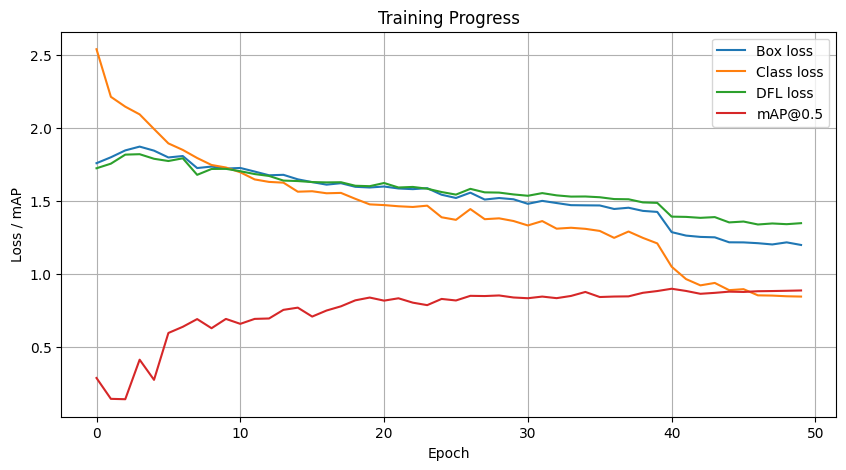

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc log file
log = pd.read_csv("/content/runs/detect/fire_yolo8_augmented/results.csv")

# In ra các cột để chắc chắn
print("Các cột có trong file log:\n", log.columns)

# Vẽ loss
plt.figure(figsize=(10, 5))
plt.plot(log["train/box_loss"], label="Box loss")
plt.plot(log["train/cls_loss"], label="Class loss")
plt.plot(log["train/dfl_loss"], label="DFL loss")  # Optional: DFL = Distribution Focal Loss

# Vẽ mAP từ cột đúng
plt.plot(log["metrics/mAP50(B)"], label="mAP@0.5")

plt.legend()
plt.title("Training Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss / mAP")
plt.grid()
plt.show()


Tìm link để lưu vào drive

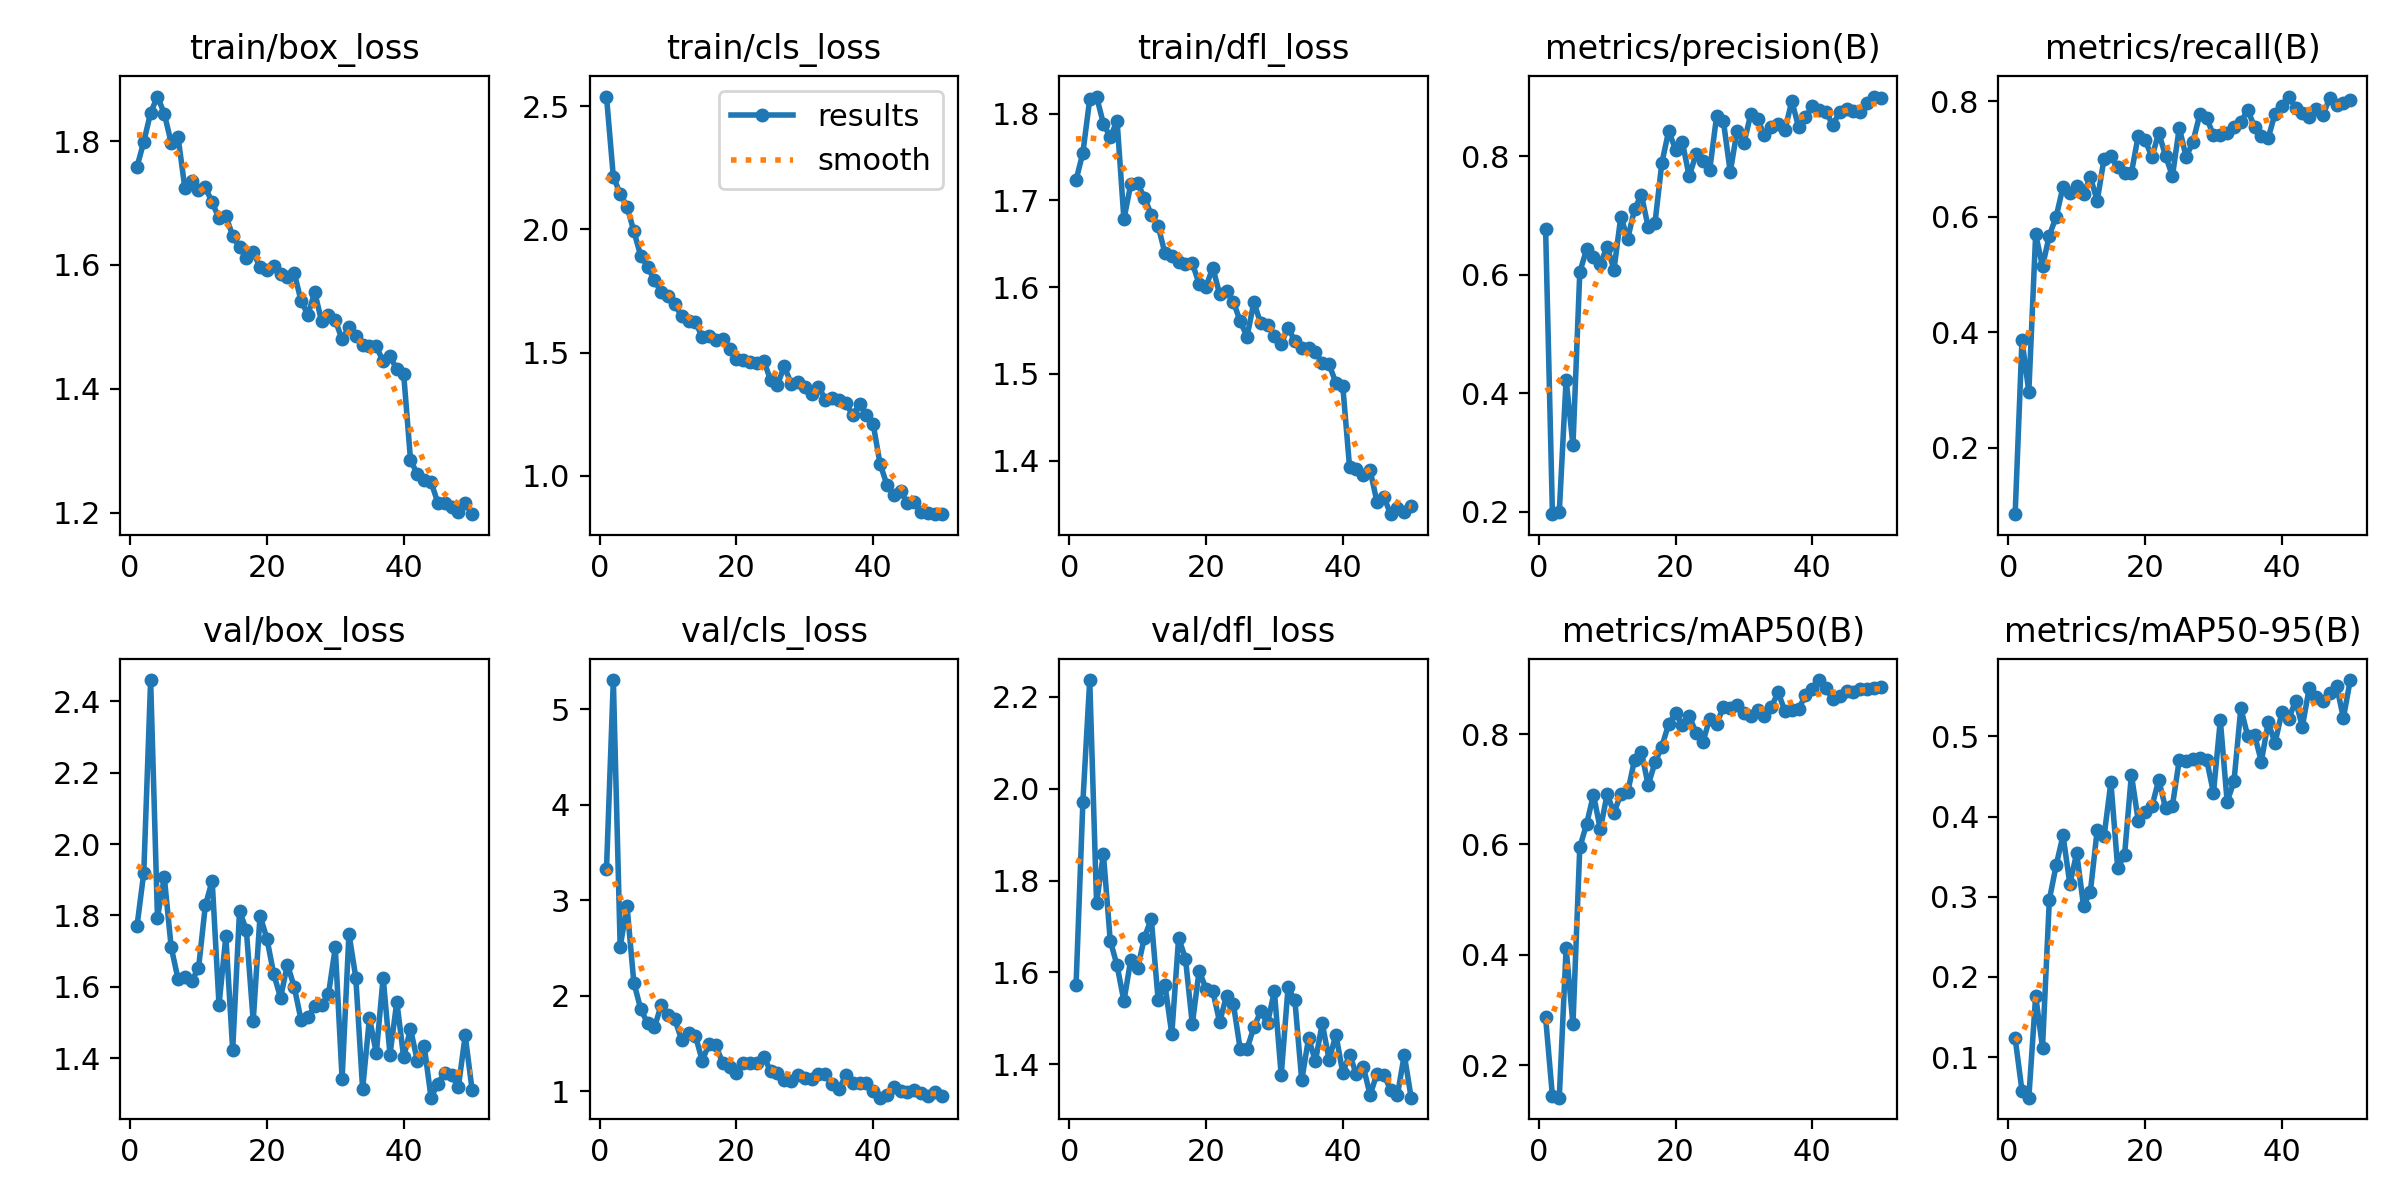

In [ ]:
from IPython.display import Image, display

# Hiển thị sơ đồ train loss và các metric
display(Image(filename='/content/runs/detect/fire_yolo8_augmented/results.png'))


In [ ]:
# Load lại mô hình đã huấn luyện
from ultralytics import YOLO
model = YOLO("runs/detect/fire_yolo8_augmented/weights/best.pt")

# Đánh giá trên tập test (YOLO sẽ tự tìm test từ data.yaml)
metrics = model.val()
print(f"📏 Precision:         {metrics.box.mp:.4f}")  # Access mp directly
print(f"📏 Recall:            {metrics.box.mr:.4f}")  # Access mr directly
print(f"📦 mAP@0.5:           {metrics.box.map50:.4f}")
print(f"📦 mAP@0.5:0.95:      {metrics.box.map:.4f}")



Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 561.6±242.7 MB/s, size: 9.2 KB)


val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]


                   all        754        950      0.898      0.801      0.886       0.57
Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val8
📏 Precision:         0.8984
📏 Recall:            0.8011
📦 mAP@0.5:           0.8863
📦 mAP@0.5:0.95:      0.5698


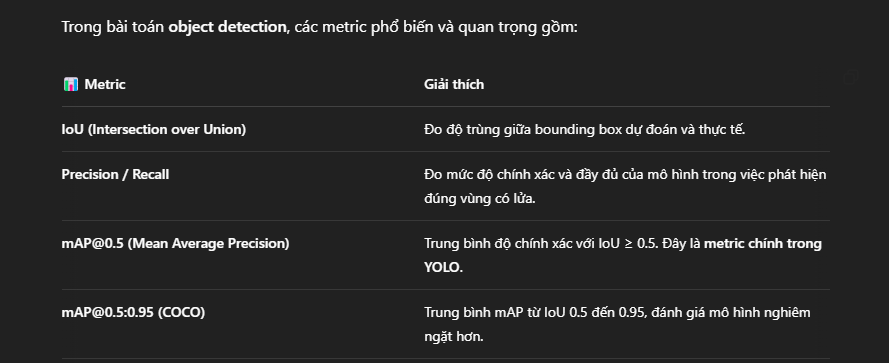

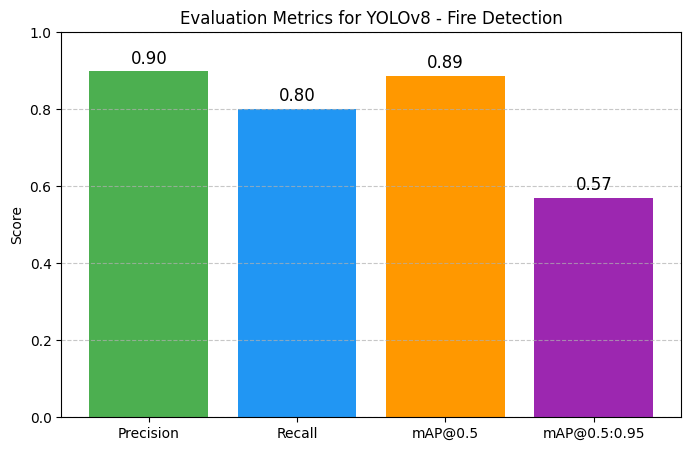

In [ ]:
import matplotlib.pyplot as plt

# Lấy các giá trị metric
metric_names = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
metric_values = [
    metrics.box.mp,  # Changed to metrics.box.mp
    metrics.box.mr,  # Changed to metrics.box.mr
    metrics.box.map50,
    metrics.box.map
]

# Vẽ bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color=['#4caf50', '#2196f3', '#ff9800', '#9c27b0'])
plt.ylim(0, 1.0)
plt.title('Evaluation Metrics for YOLOv8 - Fire Detection')
plt.ylabel('Score')

# Hiển thị giá trị trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.2f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Lưu  model yolo8 vào drive

In [ ]:

# 📁 Lưu mô hình đã train vào Google Drive
!cp runs/detect/fire_yolo8_augmented/weights/best.pt /content/drive/MyDrive/Computer_Vision/Cuoi_Ky/fire_yolov8_tested.pt


# Mô hình YOLO 5

In [ ]:
# 🔽 1. Cài đặt YOLOv5 (bằng cách sử dụng Ultralytics)
!pip install ultralytics

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17320 (from 3)
Receiving objects: 100% (17410/17410), 16.30 MiB | 13.81 MiB/s, done.
Resolving deltas: 100% (11932/11932), done.
/content/yolov5


In [ ]:

# 📚 2. Tải dataset từ Roboflow (chọn định dạng YOLOv5)
from roboflow import Roboflow
from ultralytics import YOLO

rf = Roboflow(api_key="g5iPt2V4Y6fxPzhQMewE")
project = rf.workspace("-jwzpw").project("continuous_fire")
version = project.version(6)
dataset = version.download("yolov5")  # ⚠️ Định dạng phù hợp cho YOLOv5

data_yaml_path = dataset.location + "/data.yaml"

print("📁 Dataset location:", dataset.location)
print("📄 data.yaml path:", data_yaml_path)

loading Roboflow workspace...
loading Roboflow project...
📁 Dataset location: /content/continuous_fire-6
📄 data.yaml path: /content/continuous_fire-6/data.yaml


In [ ]:
# 🧠 3. Tạo và huấn luyện YOLOv5 với Augmentation như YOLOv8
model = YOLO("yolov5n.pt")  # Tải mô hình YOLOv5 Tiny

# 🚀 Huấn luyện mô hình với các tham số augmentation tương tự YOLOv8
model.train(
    data=data_yaml_path,  # Đường dẫn đến file data.yaml
    epochs=50,            # Số lượng epoch huấn luyện
    imgsz=640,            # Kích thước ảnh đầu vào
    batch=16,             # Kích thước batch

    name="fire_yolo5_augmented",  # Tên của experiment / folder lưu kết quả

    # 🧪 Cấu hình kỹ thuật Augmentation để tăng dữ liệu huấn luyện
    degrees=10,           # Xoay ảnh ±10 độ
    translate=0.1,        # Dịch chuyển ảnh ±10%
    scale=0.5,            # Phóng to/thu nhỏ ảnh ±50%
    shear=2.0,            # Nghiêng ảnh
    perspective=0.001,    # Biến dạng phối cảnh nhẹ
    flipud=0.2,           # Lật ảnh theo chiều dọc với xác suất 20%
    fliplr=0.5,           # Lật ảnh theo chiều ngang với xác suất 50%
    mosaic=1.0,           # Áp dụng kỹ thuật Mosaic (ghép 4 ảnh)
    mixup=0.2,            # Áp dụng MixUp với xác suất 20%

    # 🔧 Các siêu tham số để điều chỉnh quá trình học
    lr0=0.005,            # Learning rate ban đầu
    lrf=0.01,             # Tỷ lệ giảm learning rate (kết thúc)
    momentum=0.937,       # Momentum cho SGD optimizer
    weight_decay=0.0005,  # Hệ số regularization để giảm overfitting
    warmup_epochs=3,      # Số epoch "làm nóng" trước khi huấn luyện chính thức
    warmup_momentum=0.8,  # Momentum trong giai đoạn warmup
    warmup_bias_lr=0.1    # Learning rate cho bias trong giai đoạn warmup
)

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 313MB/s]

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/continuous_fire-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fire_yolo5_augmented, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

train: Scanning /content/continuous_fire-6/train/labels.cache... 1004 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±1.6 ms, read: 264.6±146.1 MB/s, size: 8.9 KB)


val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<?, ?it/s]


Plotting labels to runs/detect/fire_yolo5_augmented/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fire_yolo5_augmented
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.24G      1.787       2.62      1.758         56        640: 100%|██████████| 63/63 [00:26<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.88it/s]

                   all        754        950      0.744      0.318      0.472      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.64G      1.785       2.21      1.725         40        640: 100%|██████████| 63/63 [00:22<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  4.00it/s]


                   all        754        950      0.454      0.488      0.447      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.66G      1.843      2.131      1.804         33        640: 100%|██████████| 63/63 [00:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]


                   all        754        950      0.425      0.491      0.373      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.66G      1.878      2.094      1.798         35        640: 100%|██████████| 63/63 [00:23<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]


                   all        754        950      0.424      0.476      0.357      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.66G      1.842      1.994      1.785         44        640: 100%|██████████| 63/63 [00:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]


                   all        754        950      0.451      0.554      0.485      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.67G      1.816      1.926      1.775         45        640: 100%|██████████| 63/63 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.13it/s]


                   all        754        950      0.497       0.56       0.47      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.67G      1.784      1.863      1.752         27        640: 100%|██████████| 63/63 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.11it/s]

                   all        754        950      0.653      0.566      0.595      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.67G      1.733      1.776      1.681         51        640: 100%|██████████| 63/63 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.93it/s]


                   all        754        950      0.551      0.613       0.49      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.68G      1.735      1.756      1.691         40        640: 100%|██████████| 63/63 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.13it/s]


                   all        754        950      0.555      0.664      0.606      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.68G      1.743      1.753      1.733         40        640: 100%|██████████| 63/63 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.12it/s]

                   all        754        950      0.705      0.693      0.739      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.69G      1.736      1.731      1.703         34        640: 100%|██████████| 63/63 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.89it/s]


                   all        754        950      0.622      0.561       0.61       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.7G      1.705      1.697      1.695         39        640: 100%|██████████| 63/63 [00:20<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.22it/s]

                   all        754        950       0.74      0.706      0.731      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.86G      1.672      1.645      1.646         30        640: 100%|██████████| 63/63 [00:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.28it/s]

                   all        754        950      0.704      0.668      0.721      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.86G      1.674      1.634      1.625         36        640: 100%|██████████| 63/63 [00:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.37it/s]

                   all        754        950        0.7      0.649      0.719      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.86G      1.648      1.602      1.654         50        640: 100%|██████████| 63/63 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.38it/s]

                   all        754        950       0.78      0.716       0.79      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.86G      1.624      1.581      1.616         29        640: 100%|██████████| 63/63 [00:20<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.36it/s]

                   all        754        950      0.745      0.716      0.778      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.86G      1.606       1.57      1.605         46        640: 100%|██████████| 63/63 [00:20<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.42it/s]


                   all        754        950      0.765      0.682      0.751      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.86G       1.62      1.538      1.596         41        640: 100%|██████████| 63/63 [00:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.57it/s]

                   all        754        950      0.751       0.66      0.767       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.86G      1.604      1.535      1.594         33        640: 100%|██████████| 63/63 [00:20<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.81it/s]

                   all        754        950      0.821      0.684      0.795      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.86G      1.601      1.518      1.593         32        640: 100%|██████████| 63/63 [00:21<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.13it/s]

                   all        754        950      0.849      0.724      0.835      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.86G      1.616      1.509      1.608         35        640: 100%|██████████| 63/63 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.16it/s]

                   all        754        950      0.836      0.714      0.839       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.86G      1.599      1.488      1.596         38        640: 100%|██████████| 63/63 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.17it/s]

                   all        754        950      0.828      0.679      0.803      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.87G      1.607      1.477      1.597         47        640: 100%|██████████| 63/63 [00:20<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.07it/s]

                   all        754        950      0.818      0.713      0.811      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.87G      1.583      1.492      1.568         40        640: 100%|██████████| 63/63 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.13it/s]

                   all        754        950       0.82      0.735      0.848      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.87G      1.561      1.416      1.559         41        640: 100%|██████████| 63/63 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.20it/s]


                   all        754        950      0.843      0.713      0.813       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.87G      1.536      1.409      1.535         40        640: 100%|██████████| 63/63 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.93it/s]

                   all        754        950      0.792      0.723      0.821      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.87G      1.574       1.48       1.58         45        640: 100%|██████████| 63/63 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.17it/s]

                   all        754        950      0.765      0.736      0.795      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.87G      1.524      1.387       1.55         48        640: 100%|██████████| 63/63 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]

                   all        754        950      0.788      0.714      0.816      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.87G      1.535       1.38      1.543         29        640: 100%|██████████| 63/63 [00:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]

                   all        754        950      0.866      0.766      0.867      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.87G      1.532       1.37      1.547         40        640: 100%|██████████| 63/63 [00:23<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]

                   all        754        950      0.821      0.772      0.867      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.87G      1.511      1.367      1.536         53        640: 100%|██████████| 63/63 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]

                   all        754        950      0.856      0.746      0.858      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.87G       1.52      1.358      1.547         48        640: 100%|██████████| 63/63 [00:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.17it/s]

                   all        754        950      0.854      0.724      0.847      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.87G      1.493      1.325      1.535         36        640: 100%|██████████| 63/63 [00:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.08it/s]

                   all        754        950      0.843       0.78      0.871       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.87G      1.483      1.333      1.518         35        640: 100%|██████████| 63/63 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]

                   all        754        950       0.88      0.727       0.85      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.87G        1.5      1.345      1.538         48        640: 100%|██████████| 63/63 [00:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.24it/s]

                   all        754        950      0.849      0.767      0.856      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.87G      1.469      1.339      1.503         33        640: 100%|██████████| 63/63 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]

                   all        754        950      0.871      0.764      0.871      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.87G       1.46      1.277      1.502         46        640: 100%|██████████| 63/63 [00:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.17it/s]

                   all        754        950      0.841      0.756       0.87      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.87G      1.465      1.315      1.504         62        640: 100%|██████████| 63/63 [00:21<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.55it/s]

                   all        754        950       0.89      0.768      0.883      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.87G       1.45      1.268      1.489         33        640: 100%|██████████| 63/63 [00:20<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.44it/s]

                   all        754        950       0.85      0.825      0.904      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.87G      1.448      1.237      1.479         36        640: 100%|██████████| 63/63 [00:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]

                   all        754        950      0.865      0.782      0.887      0.532


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.87G      1.301      1.093      1.394         16        640: 100%|██████████| 63/63 [00:19<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.33it/s]

                   all        754        950      0.853      0.782      0.885      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.87G      1.278      1.003      1.391         16        640: 100%|██████████| 63/63 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.84it/s]

                   all        754        950      0.897        0.8      0.909      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.87G      1.272     0.9458      1.388         20        640: 100%|██████████| 63/63 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.31it/s]

                   all        754        950       0.87      0.795      0.891      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.87G      1.295     0.9743      1.392         17        640: 100%|██████████| 63/63 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.68it/s]

                   all        754        950      0.904      0.801      0.908       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.87G      1.256     0.9191       1.36         18        640: 100%|██████████| 63/63 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.70it/s]

                   all        754        950      0.871      0.807      0.906      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.87G      1.216     0.9152      1.345         20        640: 100%|██████████| 63/63 [00:17<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.85it/s]

                   all        754        950      0.875      0.817      0.906       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.87G      1.242     0.8921      1.341         19        640: 100%|██████████| 63/63 [00:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.33it/s]

                   all        754        950      0.896      0.816      0.916      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.87G      1.231     0.8719      1.347         16        640: 100%|██████████| 63/63 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.59it/s]

                   all        754        950      0.874      0.824      0.911       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.87G      1.234     0.8678      1.337         15        640: 100%|██████████| 63/63 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.41it/s]

                   all        754        950      0.906      0.801      0.909      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.87G       1.22     0.8745      1.352         19        640: 100%|██████████| 63/63 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.29it/s]

                   all        754        950      0.871      0.835      0.909      0.562



50 epochs completed in 0.386 hours.
Optimizer stripped from runs/detect/fire_yolo5_augmented/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/fire_yolo5_augmented/weights/best.pt, 5.3MB

Validating runs/detect/fire_yolo5_augmented/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5n summary (fused): 84 layers, 2,503,139 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.83it/s]


                   all        754        950      0.895      0.816      0.916      0.566
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/fire_yolo5_augmented


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7410d5ea90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Các cột có trong file log:
 Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


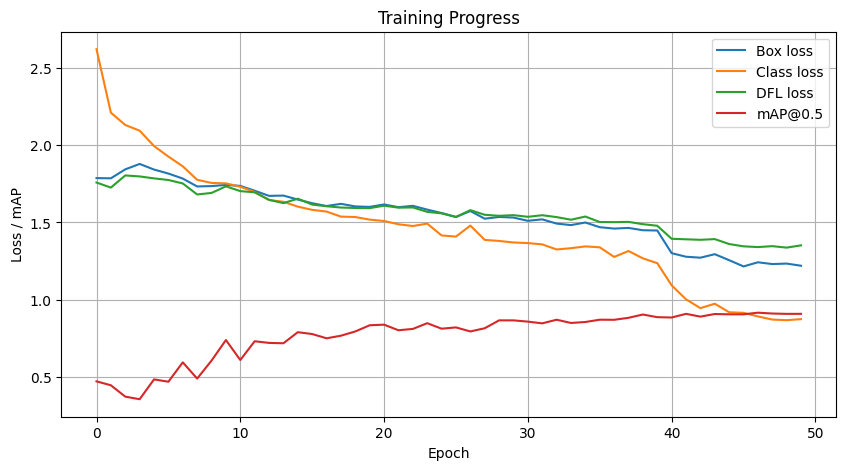

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc log file
log1 = pd.read_csv("/content/runs/detect/fire_yolo5_augmented/results.csv")

# In ra các cột để chắc chắn
print("Các cột có trong file log:\n", log1.columns)

# Vẽ loss
plt.figure(figsize=(10, 5))
plt.plot(log1["train/box_loss"], label="Box loss")
plt.plot(log1["train/cls_loss"], label="Class loss")
plt.plot(log1["train/dfl_loss"], label="DFL loss")  # Optional: DFL = Distribution Focal Loss

# Vẽ mAP từ cột đúng
plt.plot(log1["metrics/mAP50(B)"], label="mAP@0.5")

plt.legend()
plt.title("Training Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss / mAP")
plt.grid()
plt.show()


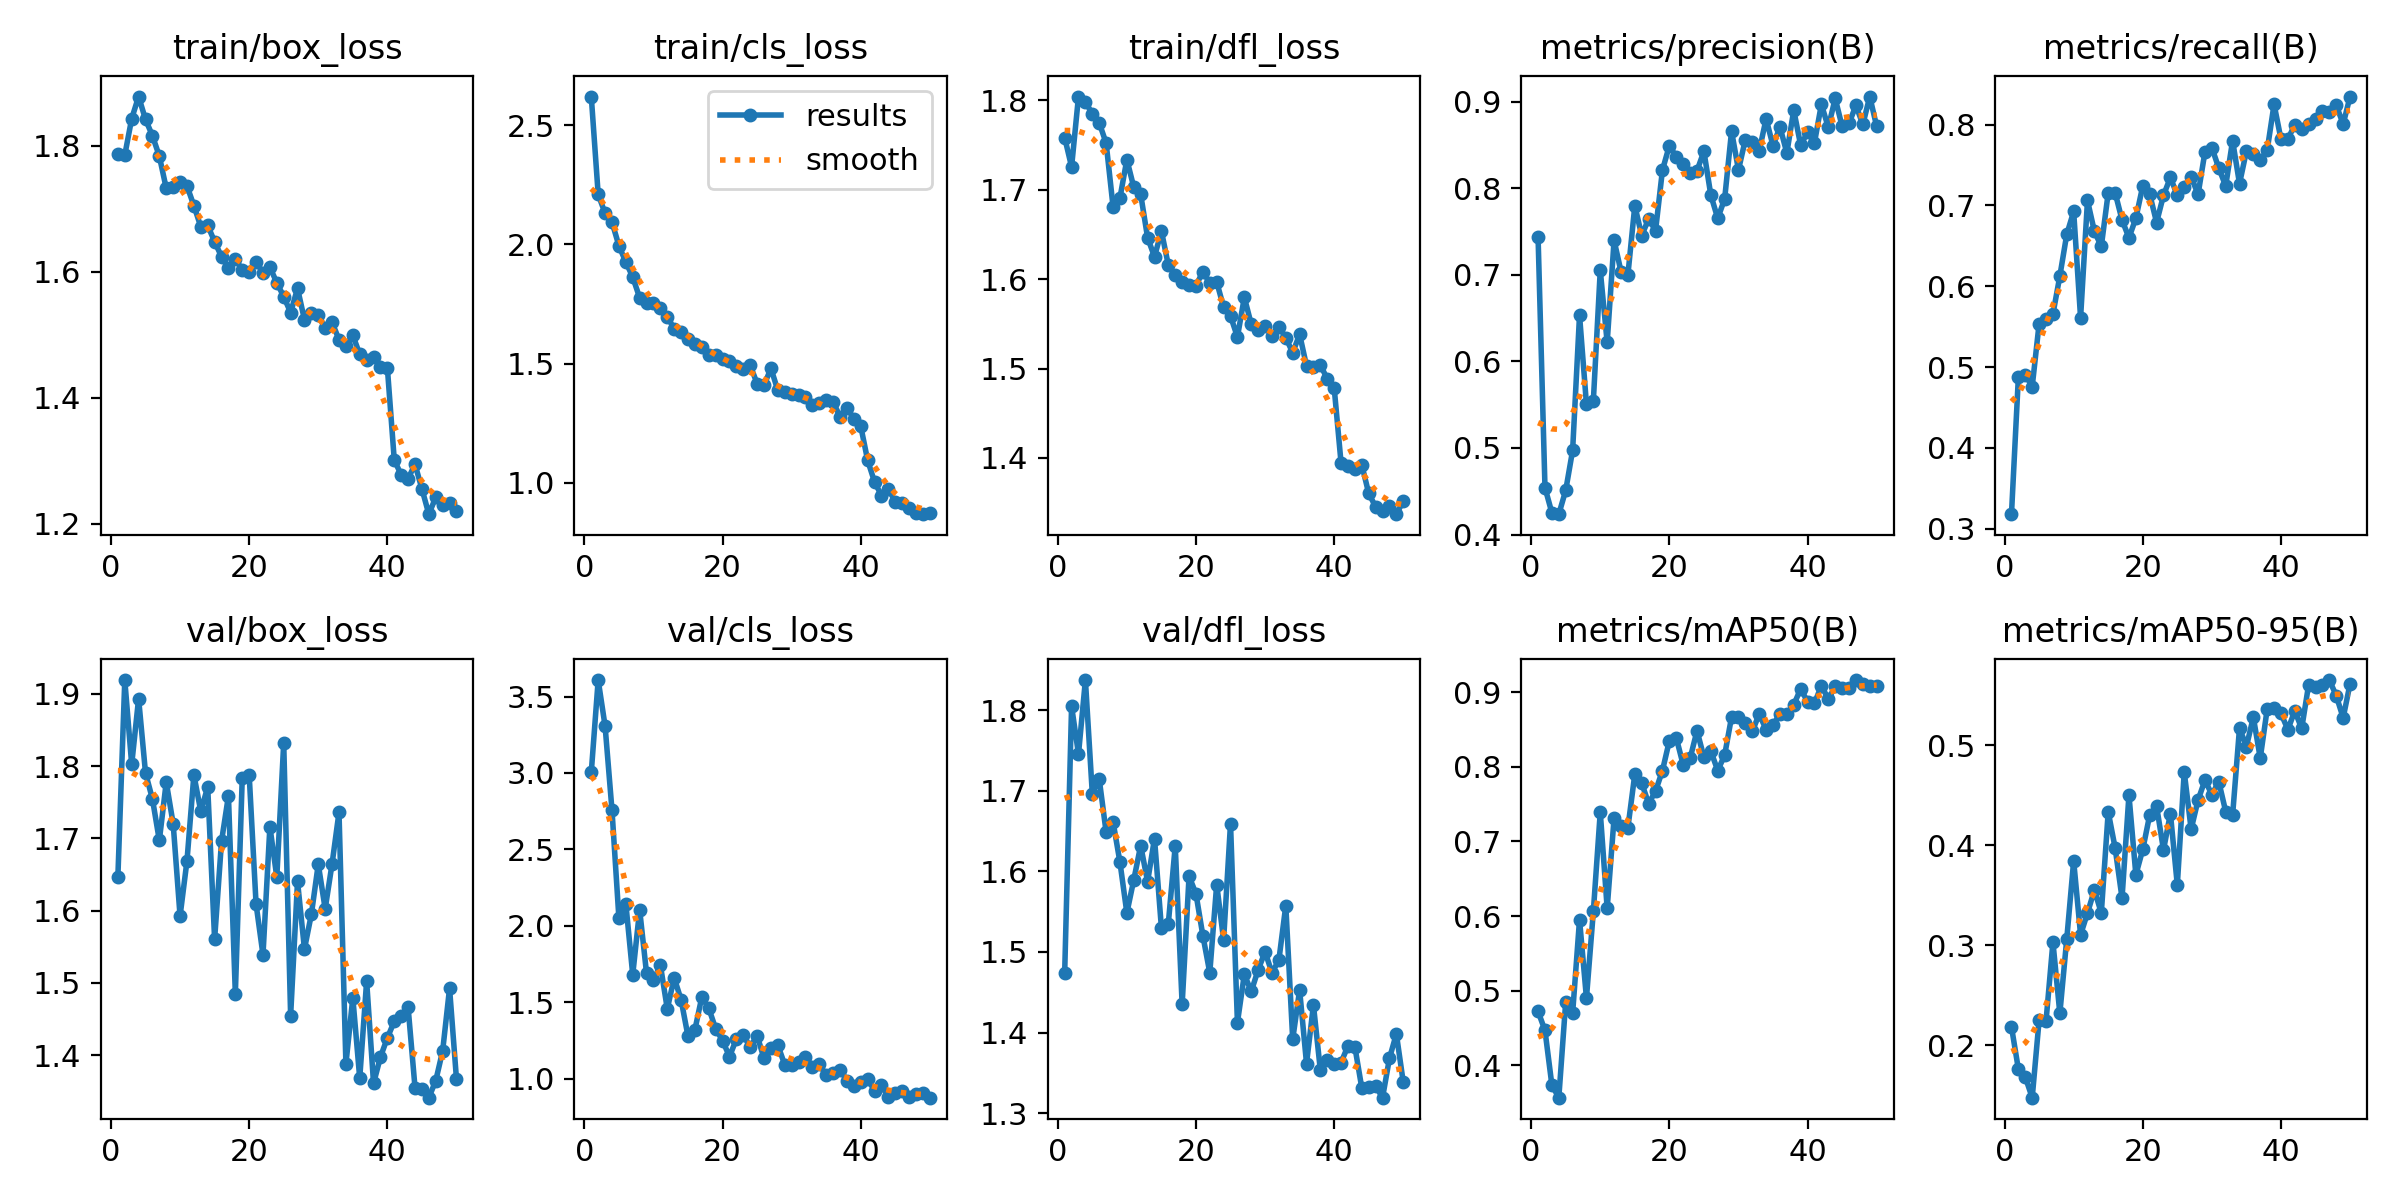

In [ ]:
from IPython.display import Image, display

# Hiển thị sơ đồ train loss và các metric
display(Image(filename='/content/runs/detect/fire_yolo5_augmented/results.png'))


In [ ]:
# Load lại mô hình đã huấn luyện
from ultralytics import YOLO
model1 = YOLO("/content/runs/detect/fire_yolo5_augmented/weights/best.pt")

# Đánh giá trên tập test (YOLO sẽ tự tìm test từ data.yaml)
metrics1 = model1.val()
print(f"📏 Precision:         {metrics1.box.mp:.4f}")  # Access mp directly
print(f"📏 Recall:            {metrics1.box.mr:.4f}")  # Access mr directly
print(f"📦 mAP@0.5:           {metrics1.box.map50:.4f}")
print(f"📦 mAP@0.5:0.95:      {metrics1.box.map:.4f}")



Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5n summary (fused): 84 layers, 2,503,139 parameters, 0 gradients, 7.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 427.1±259.8 MB/s, size: 7.8 KB)


val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.23it/s]


                   all        754        950      0.895      0.816      0.916      0.565
Speed: 1.4ms preprocess, 4.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val10
📏 Precision:         0.8949
📏 Recall:            0.8159
📦 mAP@0.5:           0.9162
📦 mAP@0.5:0.95:      0.5648


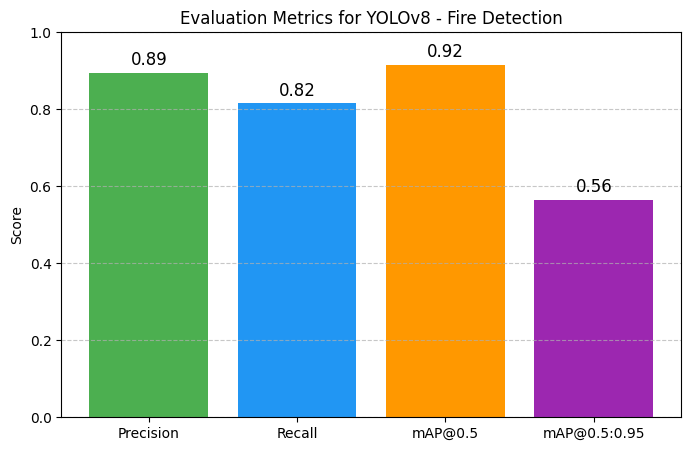

In [ ]:
import matplotlib.pyplot as plt

# Lấy các giá trị metric
metric_names = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
metric_values = [
    metrics1.box.mp,  # Changed to metrics.box.mp
    metrics1.box.mr,  # Changed to metrics.box.mr
    metrics1.box.map50,
    metrics1.box.map
]

# Vẽ bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color=['#4caf50', '#2196f3', '#ff9800', '#9c27b0'])
plt.ylim(0, 1.0)
plt.title('Evaluation Metrics for YOLOv8 - Fire Detection')
plt.ylabel('Score')

# Hiển thị giá trị trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.2f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:

# 📁 Lưu mô hình đã train vào Google Drive
!cp runs/detect/fire_yolo8_augmented/weights/best.pt /content/drive/MyDrive/Computer_Vision/Cuoi_Ky/fire_yolov5_tested.pt


# Ứng dụng mô hình

In [ ]:
# Cài các thư viện cần thiết
!pip install ultralytics gradio opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Mount Google Drive để tải model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# Copy mô hình từ Drive
!cp /content/drive/MyDrive/Computer_Vision/Cuoi_Ky/fire_yolov8_tested.pt ./fire_model.pt

# Đang cần cài thiện lại phần ứng dụng làm bằng web cam khi phát hiện cháy thì đưa ra cảnh báo

In [ ]:
import cv2
import time
import gradio as gr
from ultralytics import YOLO

# Load mô hình
model = YOLO("fire_model.pt")
print("📦 Loaded model with classes:", model.names)

# Hàm xử lý ảnh
def detect_fire(image):
    start_time = time.time()

    # Chuyển ảnh RGB -> BGR vì OpenCV/YOLO dùng BGR
    img_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Chạy inference
    results = model(img_bgr, conf=0.1)[0]
    print("📌 Detections:", results.boxes)

    # Vẽ kết quả
    annotated_frame = results.plot(labels=True, probs=True)

    # Tính FPS
    end_time = time.time()
    fps = 1 / (end_time - start_time)
    fps_text = f"FPS: {fps:.2f}"

    # Overlay FPS
    cv2.putText(annotated_frame, fps_text, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    return annotated_frame

# Gradio UI
demo = gr.Interface(
    fn=detect_fire,
    inputs=gr.Image(type="numpy", label="Upload Image or Frame"),
    outputs=gr.Image(type="numpy", label="Detection Output"),
    title="🔥 Fire Detection using YOLOv8",
    description="Upload ảnh hoặc chụp webcam để kiểm tra phát hiện cháy.",
    live=True
)

demo.launch()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
📦 Loaded model with classes: {0: 'fire'}
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5ca674b2c46b47ae7c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load model đã fine-tuned
model = YOLO("/content/drive/MyDrive/Computer_Vision/Cuoi_Ky/fire_yolov8_tested.pt")


In [ ]:
# Đường dẫn ảnh cần kiểm tra
img_path = "/content/drive/MyDrive/Computer_Vision/Cuoi_Ky/ok1.jpg"  # Thay ảnh của bạn vào đây

# Chạy model nhận diện
results = model(img_path)

# Hiển thị ảnh kết quả với bounding box
results[0].show()

# Nếu dùng trong Colab: dùng matplotlib để hiển thị
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Ảnh gốc")
plt.show()

# In ra nhãn dự đoán
for result in results:
    boxes = result.boxes
    names = result.names
    if len(boxes) == 0:
        print("🔥 Không phát hiện thấy lửa.")
    else:
        print("🚨 Phát hiện có lửa!")
        for box in boxes:
            cls_id = int(box.cls)
            conf = float(box.conf)
            print(f" - Nhãn: {names[cls_id]}, Độ tin cậy: {conf:.2f}")


Output hidden; open in https://colab.research.google.com to view.

Chạy bằng visual thì sử dụng cái này

In [ ]:
cap = cv2.VideoCapture(0)  # Webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    start_time = time.time()
    results = model(frame)[0]
    annotated = results.plot()
    fps = 1 / (time.time() - start_time)
    cv2.putText(annotated, f"FPS: {fps:.2f}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Fire Detection", annotated)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
